# Terrorist Attack Around The World

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset 

In [2]:
df = pd.read_csv("D:/libraries/Terrorist attack srounfd the world/globalterrorism.csv",encoding='latin-1', index_col=False, sep=',', low_memory=False,chunksize=1000)
terror=pd.concat(df,ignore_index=True)

####  First 10 values of the data

In [3]:
terror.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [4]:
# unique data
terror.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [5]:
# coulumns in th dataset
terror.columns
# there are so many coulumns to see all the columns
# pd.set_option('display.max_columns',135)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
# shape of the data
terror.shape

(181691, 135)

In [7]:
# data types of the dataset
terror.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

#### Extracting columns

In [8]:
cols=['iyear','imonth','iday','country_txt','city','latitude',
      'longitude','location','attacktype1_txt','targtype1_txt','targsubtype1_txt','target1',
      'gname','motive','weaptype1_txt','dbsource','region_txt','nkill','nwound','natlty1_txt','weapdetail'
      ]

In [9]:
terror_clean = pd.DataFrame(data=terror,columns=cols)

In [10]:
# data after the cleaning
terror_clean.head()

,iyear,imonth,iday,country_txt,city,latitude,longitude,location,attacktype1_txt,targtype1_txt,...,target1,gname,motive,weaptype1_txt,dbsource,region_txt,nkill,nwound,natlty1_txt,weapdetail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,...,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),...,"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,...,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN
3,1970,1,0,Greece,Athens,37.997490,23.762728,NaN,Bombing/Explosion,Government (Diplomatic),...,U.S. Embassy,Unknown,NaN,Explosives,PGIS,Western Europe,NaN,NaN,United States,Explosive
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Government (Diplomatic),...,U.S. Consulate,Unknown,NaN,Incendiary,PGIS,East Asia,NaN,NaN,United States,Incendiary


In [11]:
# change shape of data
terror_clean.shape
# 21 columns from 135 columns

(181691, 21)

In [12]:
terror_clean.dtypes

iyear                 int64
imonth                int64
iday                  int64
country_txt          object
city                 object
latitude            float64
longitude           float64
location             object
attacktype1_txt      object
targtype1_txt        object
targsubtype1_txt     object
target1              object
gname                object
motive               object
weaptype1_txt        object
dbsource             object
region_txt           object
nkill               float64
nwound              float64
natlty1_txt          object
weapdetail           object
dtype: object

####  Checking the null values


In [13]:
for i in terror_clean:
    null_rate = terror[i].isna().sum()/len(terror_clean)*100
    if null_rate>0:
        print('{} null rate:{}%'.format(i,round(null_rate,2)))

city null rate:0.24%
latitude null rate:2.51%
longitude null rate:2.51%
location null rate:69.46%
targsubtype1_txt null rate:5.71%
target1 null rate:0.35%
motive null rate:72.17%
nkill null rate:5.68%
nwound null rate:8.98%
natlty1_txt null rate:0.86%
weapdetail null rate:37.24%


In [14]:
# null rate in numbers
terror_clean.isna().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
city                   434
latitude              4556
longitude             4557
location            126196
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
target1                636
gname                    0
motive              131130
weaptype1_txt            0
dbsource                 0
region_txt               0
nkill                10313
nwound               16311
natlty1_txt           1559
weapdetail           67670
dtype: int64

city,latitude,longitude,location

#### Changing the columns name

In [15]:
#there are some columns which have some character attached to it,to do some cleaning change the columns name
terror_clean.rename(columns={"iyear":"year","imonth":"month","iday":"day","country_txt":"Country","attacktype1_txt":"Attack type",
                             "targtype1_txt":"Target Type","targsubtype1_txt":"Target Subtype","target1":"Target",
                             "gname":"Group name","weaptype1_txt":"Weapon type","dbsource":"Source","region_txt":"Region",
                             'nkill':'Killed','nwound':'Wounded','weapdetail':'weapon_detail','natlty1_txt':'nationality'},inplace=True)

In [16]:
# name changed
terror_clean.head(2)

,year,month,day,Country,city,latitude,longitude,location,Attack type,Target Type,...,Target,Group name,motive,Weapon type,Source,Region,Killed,Wounded,nationality,weapon_detail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,...,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),...,"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN


In [17]:
pd.set_option('display.max_columns',75)
terror_clean.head()

,year,month,day,Country,city,latitude,longitude,location,Attack type,Target Type,Target Subtype,Target,Group name,motive,Weapon type,Source,Region,Killed,Wounded,nationality,weapon_detail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN
3,1970,1,0,Greece,Athens,37.997490,23.762728,NaN,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,PGIS,Western Europe,NaN,NaN,United States,Explosive
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,PGIS,East Asia,NaN,NaN,United States,Incendiary


#### Extarcting data for analysis 

In [18]:
terror_clean['Calsualities'] = terror_clean['Wounded']+terror_clean['Killed']
terror_clean.head(2)

,year,month,day,Country,city,latitude,longitude,location,Attack type,Target Type,Target Subtype,Target,Group name,motive,Weapon type,Source,Region,Killed,Wounded,nationality,weapon_detail,Calsualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0


In [19]:
nationality = terror_clean[terror_clean['nationality']!='Unknown']
nationality['nationality'].isna().sum()

1559

In [20]:
nationality_data =nationality['nationality'].value_counts().reset_index()
nationality_data.rename(columns={"index":"Nationality","nationality":"Counts"},inplace=True)

In [21]:
# after rename
nationality_data
pd.set_option('display.max_rows',215)
nationality_data

,Nationality,Counts
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
5,Philippines,6685
6,Peru,5840
7,El Salvador,5212
8,United States,5065
9,Turkey,4636


In [22]:
# unique values in nationality
terror_clean['nationality'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

#### Filtering the group name data

In [23]:
group_name= terror_clean[terror_clean['Group name']!='Unknown']
group_data=group_name['Group name'].value_counts().reset_index()
group_data.rename(columns={"index":"Group name","Group name":"Count"},inplace=True)

In [24]:
#group_name without unknown
group_name.head(2)
#98909 rows × 22 columns

,year,month,day,Country,city,latitude,longitude,location,Attack type,Target Type,Target Subtype,Target,Group name,motive,Weapon type,Source,Region,Killed,Wounded,nationality,weapon_detail,Calsualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0


In [25]:
group_data

,Group name,Count
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
...,...,...
3531,Guajajara Tribe,1
3532,Khmer Serei Guerrillas,1
3533,Liberal Democratic Council for Missing Land,1
3534,Fighting Ecologist Movement,1


#### Filtering city data

In [26]:
city_name = terror_clean[terror_clean['city']!='Unknown']
city_data = city_name['city'].value_counts().reset_index()
city_data.rename(columns={"index":"City","city":"Count"},inplace=True)

In [27]:
#city_data without unknown
city_name.head(2)
#171916 rows × 22 columns

,year,month,day,Country,city,latitude,longitude,location,Attack type,Target Type,Target Subtype,Target,Group name,motive,Weapon type,Source,Region,Killed,Wounded,nationality,weapon_detail,Calsualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0


In [28]:
city_data

,City,Count
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
...,...,...
36668,Kand-i-Kapar,1
36669,Rawalkot district,1
36670,Shaalan,1
36671,Panniyannur,1


#### Fitering Weapon data

In [29]:
weapon_name =terror_clean[terror_clean['Weapon type']!='Unknown']
weapon_data=weapon_name['Weapon type'].value_counts().reset_index()
weapon_data.rename(columns={"index":"Weapon type","Weapon type":"Count"},inplace=True)

In [30]:
weapon_data

,Weapon type,Count
0,Explosives,92426
1,Firearms,58524
2,Incendiary,11135
3,Melee,3655
4,Chemical,321
5,Sabotage Equipment,141
6,Vehicle (not to include vehicle-borne explosiv...,136
7,Other,114
8,Biological,35
9,Fake Weapons,33


## Visulalization


Text(0, 0.5, 'Nationality')

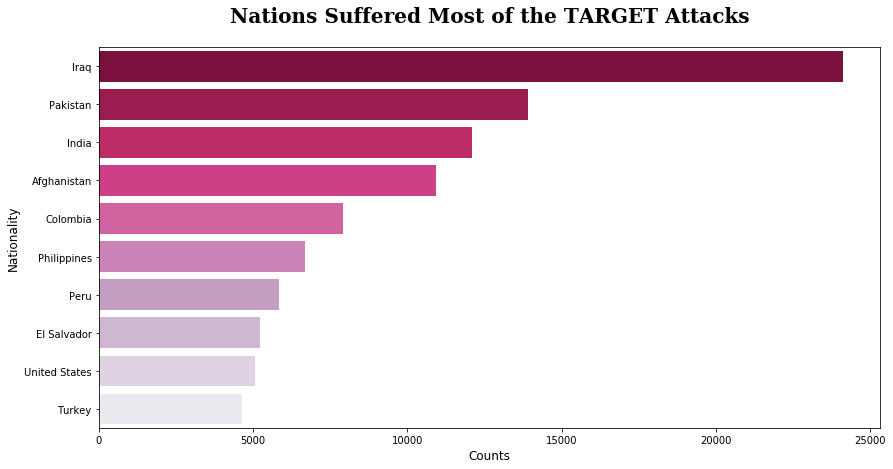

In [31]:
#top 10 nationality
plt.figure(figsize=(14,7))
ax=sns.barplot(data=nationality_data.iloc[:10],x='Counts',y='Nationality',palette='PuRd_r')
plt.title('Nations Suffered Most of the TARGET Attacks',size=20,y=1.05,fontfamily='serif',fontweight='bold')
plt.xlabel('Counts',size=12)
plt.ylabel('Nationality',size=12)

Text(0, 0.5, 'Group name')

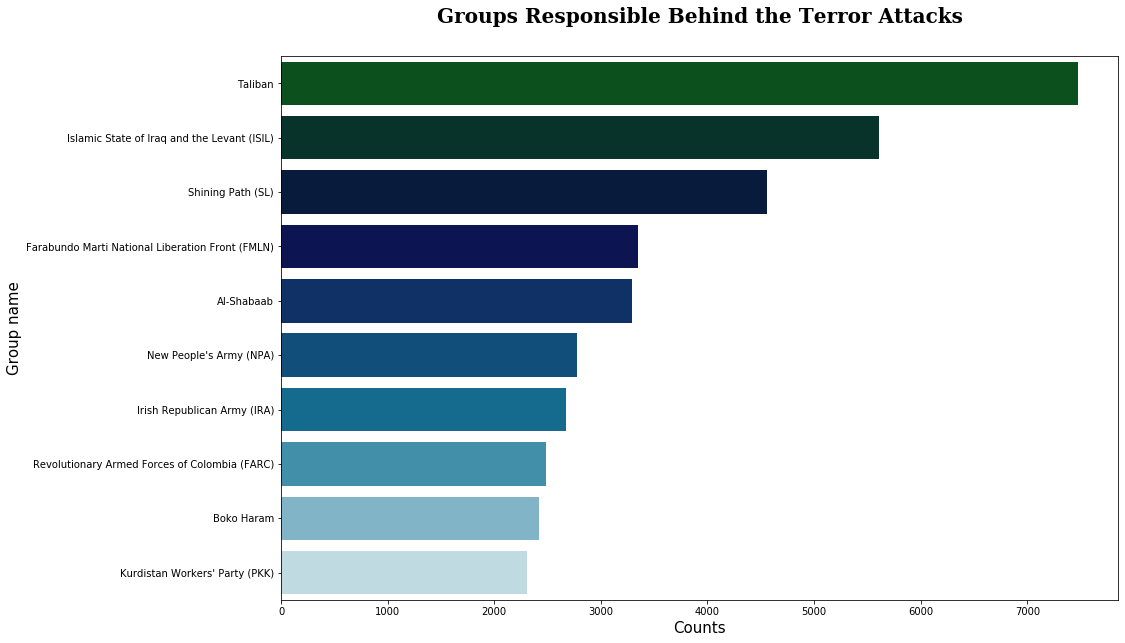

In [32]:
#top 10 group with most attack
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.barplot(data=group_data.iloc[:10],x='Count',y='Group name',palette='ocean')
plt.title('Groups Responsible Behind the Terror Attacks',y=1.05,size=20,fontfamily='serif',weight='bold')
plt.xlabel('Counts',size=15)
plt.ylabel('Group name',size=15)

Text(0, 0.5, 'City name')

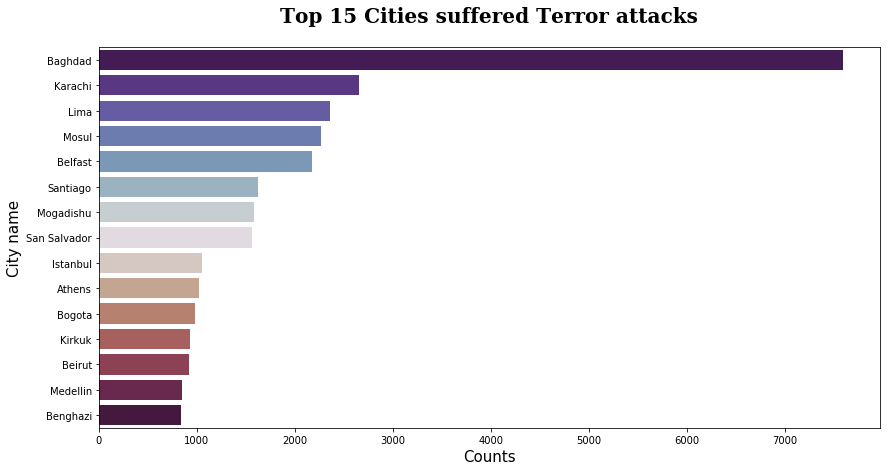

In [33]:
# top 15 cities with most attack
plt.figure(figsize=(14,7))
ax=sns.barplot(x='Count',y='City',data=city_data.iloc[:15],palette='twilight_shifted')
plt.title('Top 15 Cities suffered Terror attacks',size=20,fontfamily='serif',weight='bold',y=1.05)
plt.xlabel('Counts',size=15)
plt.ylabel('City name',size=15)

Text(0, 0.5, 'City name')

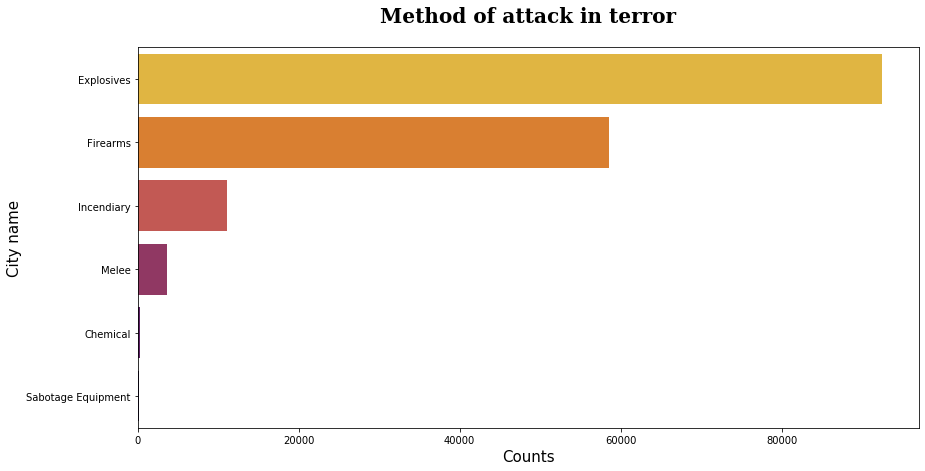

In [34]:
# top 6 weapon type used for terror
plt.figure(figsize=(14,7))
ax=sns.barplot(x='Count',y='Weapon type',data=weapon_data.iloc[:6],palette='inferno_r')
plt.title('Method of attack in terror',size=20,fontfamily='serif',weight='bold',y=1.05)
plt.xlabel('Counts',size=15)
plt.ylabel('City name',size=15)

#### Date filtering

In [35]:
terror_clean['month'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [36]:
def month_name(mon):
    if mon==1:
        return 'January'
    if mon==2:
        return 'Ferbuary'
    if mon==3:
        return 'March'
    if mon==4:
        return 'April'
    if mon==5:
        return 'May'
    if mon==6:
        return 'June'
    if mon==7:
        return 'July'
    if mon==8:
        return 'August'
    if mon ==9:
        return 'September'
    if mon ==10:
        return 'October'
    if mon ==11:
        return 'November'
    if mon ==0:
        return 'Missing'    
    
    else:
        return 'December'

In [37]:
terror_clean['Month_name']=terror_clean['month'].apply(month_name)


In [38]:
terror_clean['month'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: month, dtype: int64

In [39]:
# month cleaning
month_name=terror_clean[terror_clean['Month_name']!='Missing']
month_data=month_name['Month_name'].value_counts().reset_index()
month_data.rename(columns={"Month_name":"Count",'index':"Month name"},inplace=True)


In [40]:
month_data

,Month name,Count
0,May,16875
1,July,16268
2,August,15800
3,October,15563
4,June,15359
5,March,15257
6,April,15152
7,January,14936
8,November,14906
9,September,14180


In [41]:
# attack type
terror_clean['Attack type'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

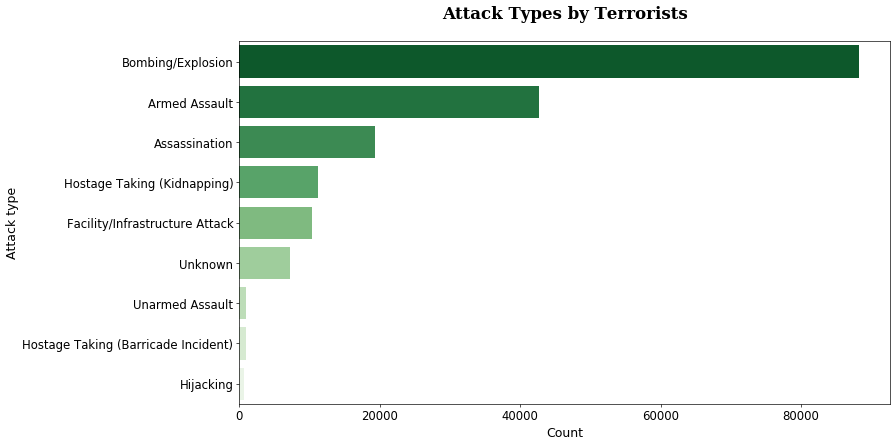

In [42]:
# top attack type
plt.figure(figsize=(14,8),dpi=60)
ax= sns.countplot(y='Attack type',data=terror_clean,palette='Greens_r',order=terror_clean['Attack type'].value_counts().index)
plt.yticks(size=14)
plt.xticks(size=14)
plt.title('Attack Types by Terrorists',size=20,fontfamily='serif',weight='bold',y=1.05)
plt.xlabel('Count',size=15)
plt.ylabel('Attack type',size=15)
plt.show()

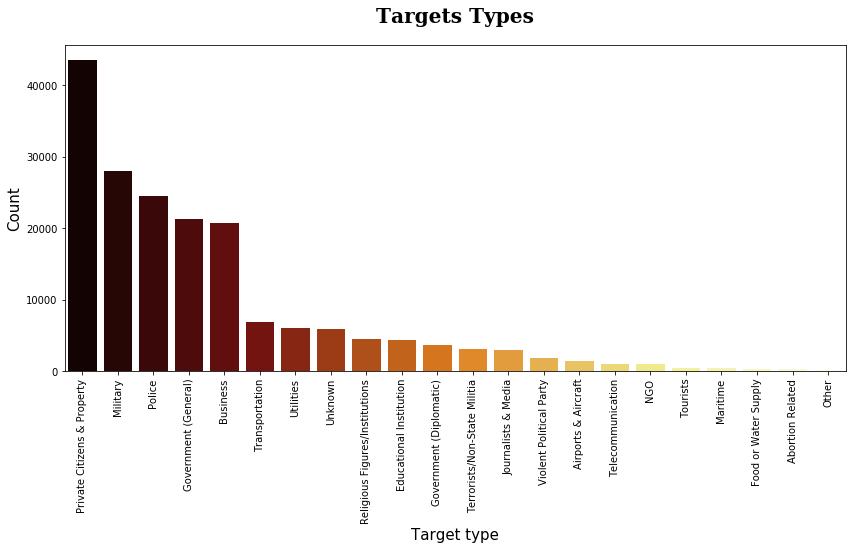

In [43]:
# target types
plt.figure(figsize=(14,6))
ax =sns.countplot(x=terror_clean['Target Type'],palette='afmhot',order=terror_clean['Target Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Targets Types',size=20,fontfamily='serif',weight='bold',y=1.05,pad=None)
plt.xlabel('Target type',size=15)
plt.ylabel('Count',size=15)
plt.show()

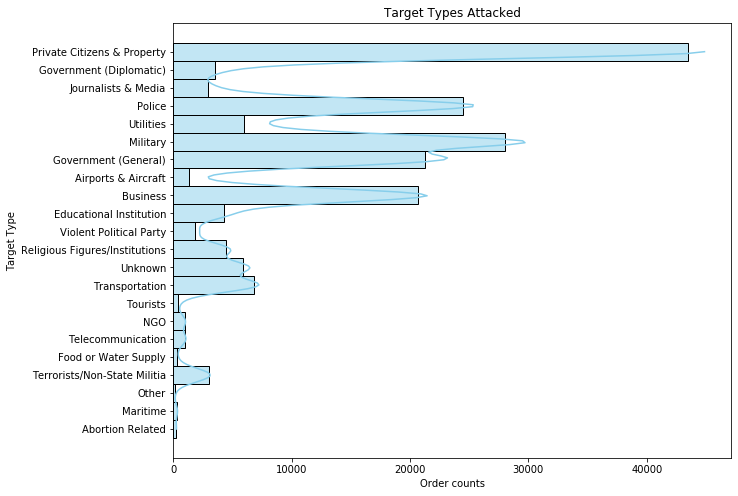

In [44]:
# pattern behaviour of target type
plt.figure(figsize=(10, 8))
sns.histplot(data=terror_clean,y='Target Type',bins=15,color='skyblue',kde=True)
plt.xlabel('Order counts')
plt.title('Target Types Attacked')
plt.show()

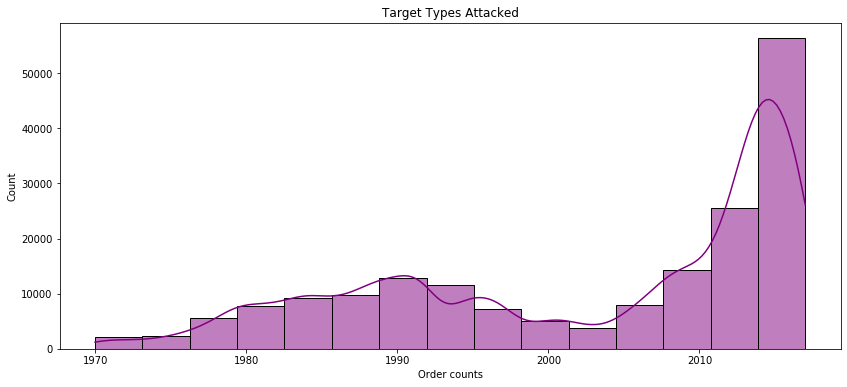

In [45]:
# pattern behaviour with year
plt.figure(figsize=(14, 6))
sns.histplot(data=terror_clean,x='year',bins=15,color='purple',kde=True)
plt.ylabel('Order counts')
plt.title('Target Types Attacked')
plt.show()

Text(0.5, 1.05, 'No of terrorist activities each year')

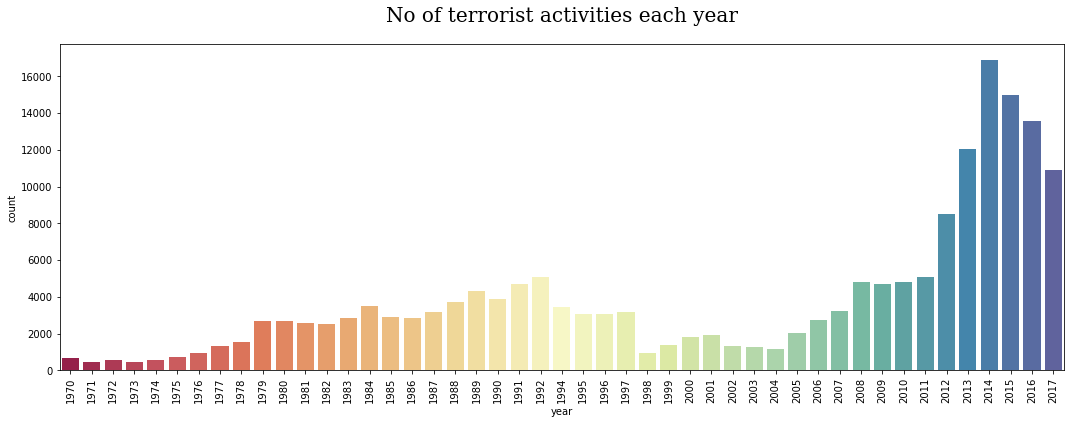

In [46]:
# no of attack through the year
plt.figure(figsize=(18,6))
ax=sns.countplot(x=terror_clean['year'],data=terror_clean,palette='Spectral')
plt.xticks(rotation=90)
plt.title('No of terrorist activities each year',size=20,fontfamily='serif',y=1.05)

#### Months 

Text(0.5, 1.0, 'Terrorist attack through months')

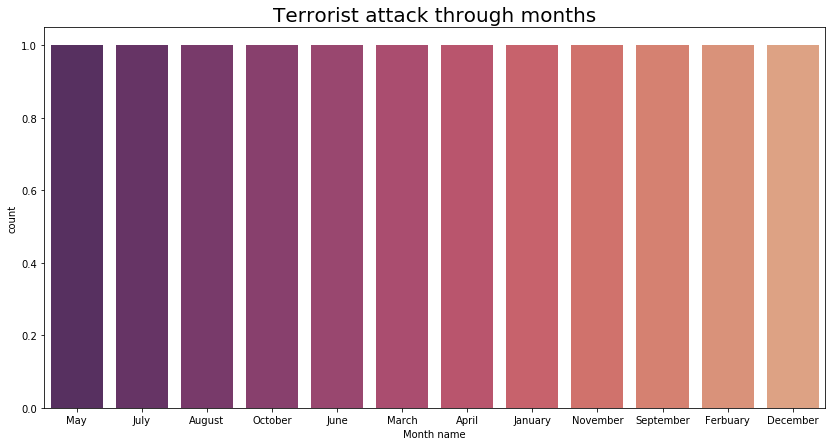

In [47]:
plt.figure(figsize=(14,7))

sns.countplot(x='Month name',data=month_data,palette='flare_r')
plt.title('Terrorist attack through months',size=20)

#### Casualities

Text(0.5, 1.05, 'Casualities in Region each year')

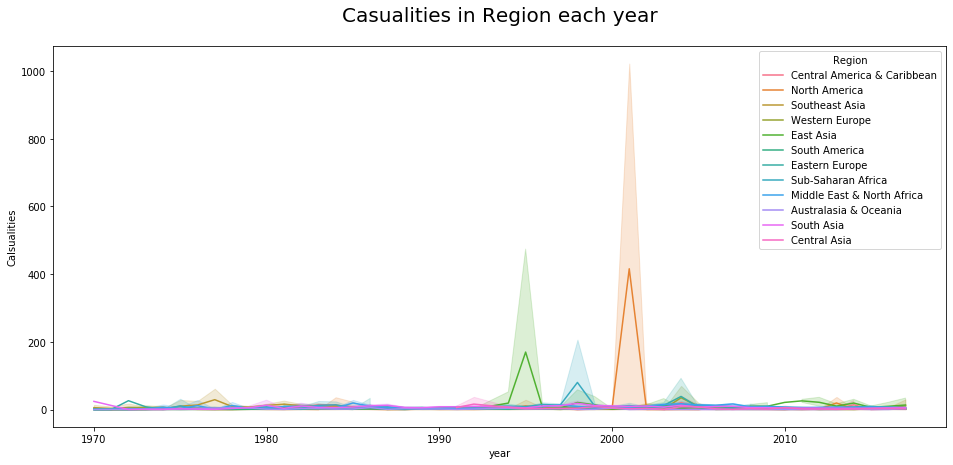

In [48]:
plt.figure(figsize=(16,7))
sns.lineplot(x='year',y='Calsualities',hue='Region',data=terror_clean)
plt.title('Casualities in Region each year',size=20,y=1.05)

#### Terrorist attack in india 

Text(0.5, 1.05, 'Terrorist Attack in india Each Year')

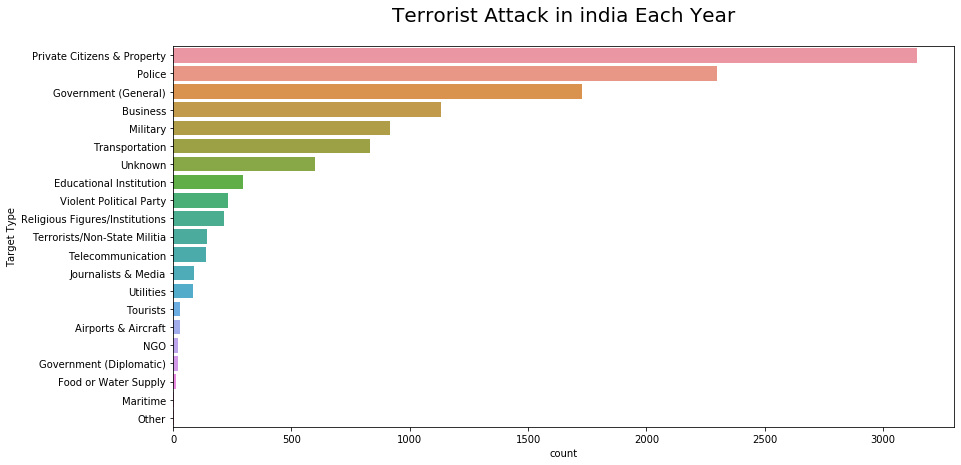

In [49]:
india = terror_clean[terror_clean['Country']=='India']
plt.figure(figsize=(14,7))
sns.countplot(y='Target Type',data=india,order=india['Target Type'].value_counts().index)
plt.title("Terrorist Attack in india Each Year",size=20,y=1.05)

#### Attack trend  

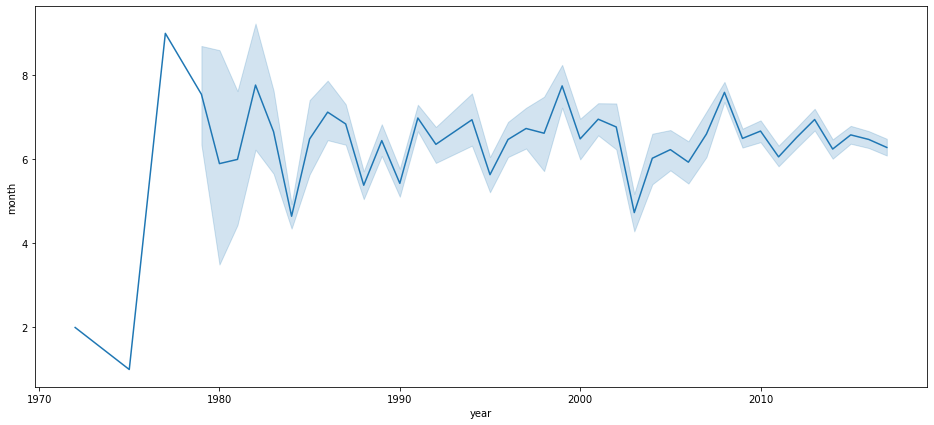

In [50]:
plt.figure(figsize=(16,7))
sns.lineplot(x='year',y='month',data=india)

#### Top 5 Countries have highest casualities 

Text(0.5, 1.05, 'Countries have highest Casualities')

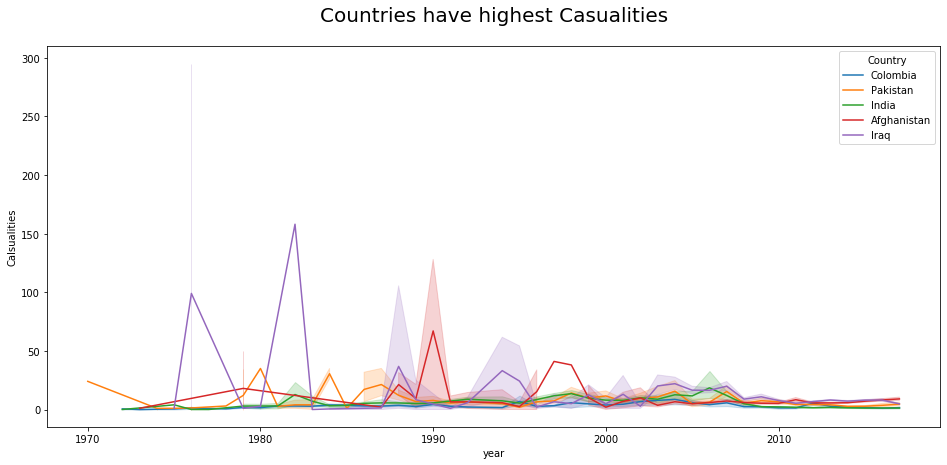

In [51]:
# Countries have heighest Casualities
plt.figure(figsize=(16,7))
ax =sns.lineplot(data=terror_clean[terror_clean['Country'].isin(['Iraq','Pakistan','India','Afghanistan','Colombia'])],x='year',y='Calsualities',hue='Country')
plt.title('Countries have highest Casualities',size=20,y=1.05)

##### Bottom 5 countries casualities

the causalties is very low to show

In [52]:
country=terror_clean.groupby(['Country'])['Calsualities'].sum().reset_index()

In [53]:
country.sort_values(by='Calsualities',ascending=False)

,Country,Calsualities
84,Iraq,202982.0
0,Afghanistan,80213.0
134,Pakistan,64427.0
80,India,47108.0
167,Sri Lanka,29792.0
189,United States,24469.0
35,Colombia,23767.0
140,Philippines,22361.0
130,Nigeria,21728.0
175,Syria,21614.0


##### Wordcloud

In [54]:
terror_show=terror_clean.dropna()

In [55]:
terror_show.isna().sum()

year              0
month             0
day               0
Country           0
city              0
latitude          0
longitude         0
location          0
Attack type       0
Target Type       0
Target Subtype    0
Target            0
Group name        0
motive            0
Weapon type       0
Source            0
Region            0
Killed            0
Wounded           0
nationality       0
weapon_detail     0
Calsualities      0
Month_name        0
dtype: int64

In [56]:
terror_show['Motive'] = terror_show['motive'].str.replace("[^a-zA-Z#]", " ")


C:\Users\211BN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
# values in motives
terror_show['Motive'].unique()

array(['To protest United States owned businesses in Puerto Rico',
       'Suspected motives were to protest the Vietnam War and or show support for the Black Panther Party and or show support for the Young Lords ',
       'Intimidate the Black Panther Party ', ...,
       'The specific motive is unknown  however  sources noted that Andrei Rudomakha had just covered the illegal building of a mansion ',
       'The specific motive is unknown  however  sources suspected that the attack may have been carried out in response to the arrest of Rashtriya Swayamsevak Sangh  RSS  members on December          ',
       'The specific motive is unknown  however  sources stated that the attack was carried out in retaliation for the death of Noor Mohammad Tantray  Noor Trali   a Jaish e Mohammad  JeM  leader  by security personnel on December          in Pulwama '],
      dtype=object)

(-0.5, 1199.5, 499.5, -0.5)

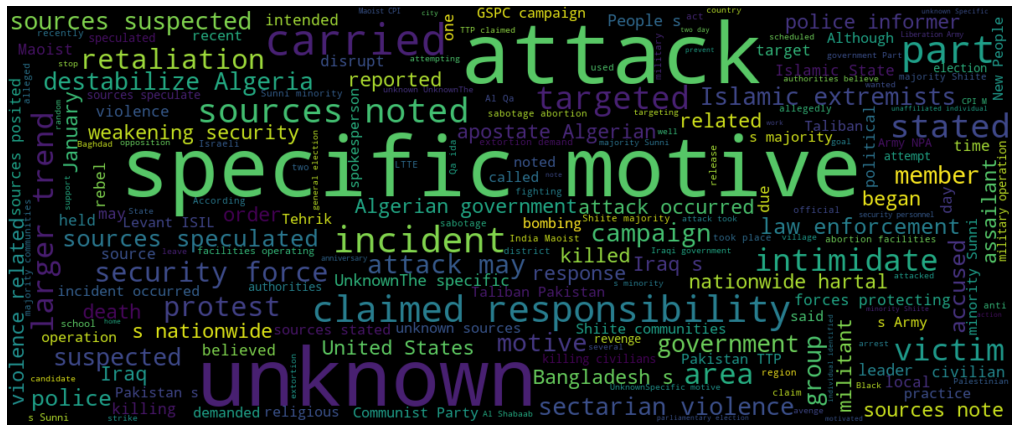

In [58]:
from wordcloud import WordCloud
plt.figure(figsize=(18,8))
wordcloud = WordCloud(background_color='black',height=500,width=1200,random_state=42, max_font_size=100).generate("".join(terror_show.Motive))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')


#### Attack type in india 

Text(0.5, 1.05, 'Attack type in india Each Year')

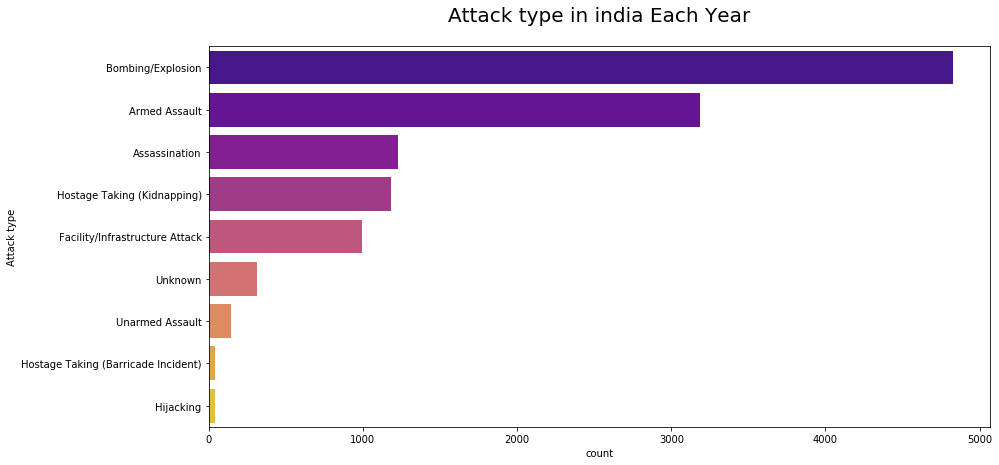

In [59]:
india = terror_clean[terror_clean['Country']=='India']
plt.figure(figsize=(14,7))
sns.countplot(y='Attack type',data=india,order=india['Attack type'].value_counts().index,palette='plasma')
plt.title("Attack type in india Each Year",size=20,y=1.05)